In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importation des données
# Convertion  dela variable Date au format datetime 

In [4]:
store_train = pd.read_csv('Data/Store_train.csv')
store_train = store_train.drop("Unnamed: 0", axis = 1)
store_train.reset_index(drop=True, inplace=True)
store_train = store_train[store_train['année'] == 2014]
store_train.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,année,mois,jour,jr sem
163,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0,...,327,1,0,0,1,990641,2014,12,31,2
164,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0,...,703,1,0,0,1,43764,2014,12,30,1
165,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0,...,700,1,0,0,1,480671,2014,12,29,0
166,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0,...,684,1,0,0,1,178939,2014,12,27,5
167,1,3,0,1270.0,9.0,2008.0,0,0.0,2011.0,0,...,421,1,0,0,1,625750,2014,12,24,2


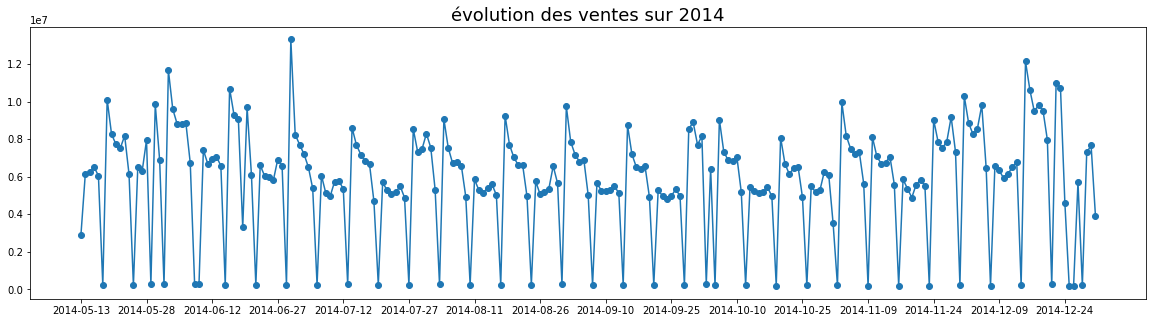

In [34]:
plt.figure(figsize = (20,5))
plt.title('évolution des ventes sur 2014', fontsize=18)
plt.plot_date(x = sales_2014_per_day['Date'].values, y = sales_2014_per_day['Sales'].values, xdate = True, ls = '-');
plt.xticks(np.arange(0,len(sales_2014_per_day.Date), 15))
plt.show()

Les ventes sur l'année 2014 au global présentent un schéma répétitif avec une poussée des ventes quotidiennes le week end

Nous allons également regarder la distribution des variables Sales et Customers à l'aide d'une boîte à moustache. 

In [6]:
sales_per_day = store_train.groupby(['Date'] , as_index = False).agg({'Sales':'sum','Customers':'sum'})
sales_per_day.head()

,Date,Sales,Customers
0,2014-05-13,2896254,351766
1,2014-05-14,6141038,744235
2,2014-05-15,6252912,759575
3,2014-05-16,6515173,784919
4,2014-05-17,6052688,700008


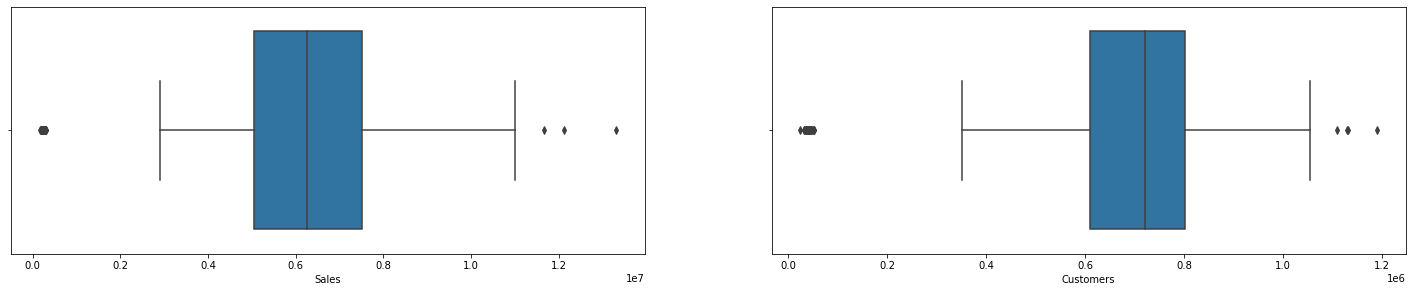

In [7]:
plt.figure(figsize = (25,10))
plt.subplot(221)
sns.boxplot(x = 'Sales', data = sales_per_day);
plt.subplot(222)
sns.boxplot(x = 'Customers', data = sales_per_day);

Les médianes de Sales et Customers se situentrespectivement autour de 6000000 et 7500000. Les deux présentent les mêmes profils :
très peu de valeurs au-delà de semblerait que nous ayons quelques magasins qui se démarquent avec des grosses ventes
et attirent plus de clients que les autres.

Observer et quantifier la relation linéaire entre les deux variables à l'aide du test de corrélation de pearson

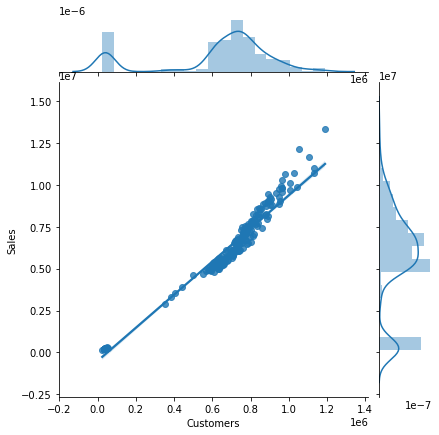

In [8]:
sns.jointplot("Customers", "Sales", data=sales_per_day, kind='reg')

On observe une relation linéaire entre les deux variables.  Nous remarquons également une distributions particulières
de Sales et Customers avec des valeurs basses puis un creux et de nouveau des valeurs. Cela fait référence à ce que  nous avons potentiellement un groupe atypique de magasins avec des chiffres plus faible que les autres. 

Nous allons donc quantifier cette relation par la corelation de pearson

In [9]:
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(sales_per_day['Sales'],sales_per_day['Customers']), index = ['pearson_coeff','p-value'], columns = ['resultat_test'])

,resultat_test
pearson_coeff,9.841907e-01
p-value,1.179791e-175


Comme nous y attendons, le nombre de clients par jours est fortement lié à la vente.
Etudions les ventes sur l'année 2014

In [10]:
# Nous allons étudier les ventes sur l'années 2014

sales_2014 = store_train[store_train['année'] == 2014]
agg_store = sales_2014.groupby(['Store'], as_index = False).agg(
    {'Sales':'sum','Customers':'sum', 'Promo': 'sum','CompetitionDistance':'unique'})

agg_store = agg_store.sort_values(by = 'Sales', ascending = False)

agg_store

,Store,Sales,Customers,Promo,CompetitionDistance
261,262,4858073,801601,90,[1180.0]
561,562,4168662,721575,90,[1210.0]
816,817,4130224,586898,89,[140.0]
1113,1114,4071990,634396,89,[870.0]
250,251,3714273,482559,88,[340.0]
...,...,...,...,...,...
572,573,154950,12659,15,[1190.0]
1048,1049,149749,23964,15,[370.0]
878,879,145138,13353,15,[75860.0]
262,263,144768,14149,15,[1140.0]


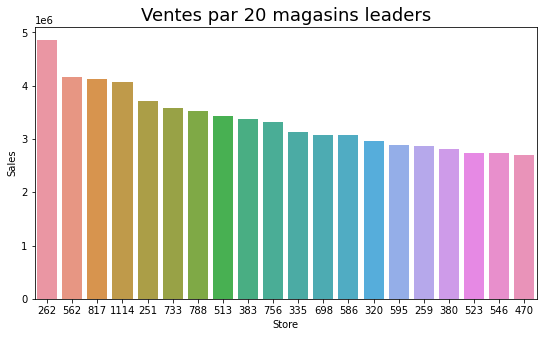

In [11]:
plt.figure(figsize = (9,5))
plt.title('Ventes par 20 magasins leaders',fontsize=18)

sns.barplot(x = 'Store', y = 'Sales', order = agg_store['Store'].head(20).values, data = agg_store.head(20));


Les magasins les plus vendeurs en 2014 sont 262, 562,1114, et 817

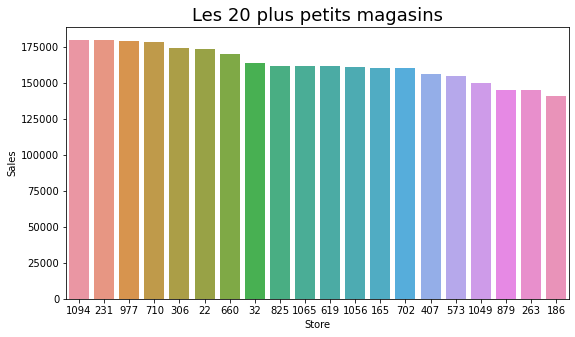

In [12]:
plt.figure(figsize = (9,5))
plt.title('Les 20 plus petits magasins',fontsize=18)

sns.barplot(x = 'Store', y = 'Sales', order = agg_store['Store'].tail(20).values, data = agg_store.tail(20));

De même les 3 magasins les moins vendeurs en 2014 sont  le 1049, 186, 263 et 879

In [13]:
# nous allons calculer le pourcentage de ventes des 20plus gros magasins et des 20 plus petits magasins
vente_lead = 0

for i in agg_store["Store"].head(20).values:

    sale = agg_store[agg_store['Store']==i]['Sales'].sum()

    vente_lead += sale

vente_less = 0

for i in agg_store["Store"].tail(20).values:

    sale = agg_store[agg_store['Store']==i]['Sales'].sum()

    vente_less += sale

In [14]:
print('Pourcentage des ventes des 20 plus gros magasins en 2014:',vente_lead/agg_store.Sales.sum()*100,'%')

print('Pourcentage des ventes des 20 plus petits magasins en 2014:',vente_less/agg_store.Sales.sum()*100,'%')

Pourcentage des ventes des 20 plus gros magasins en 2014: 4.99068737242772 %
Pourcentage des ventes des 20 plus petits magasins en 2014: 0.24190128518551476 %


Nous allons créer une variable cat_sales sur les 20 plus gros magasins L'objectif est de voir si dans les magasins il y a plutôt un grand nombre de petites ventes ou bien de grosses ventes. Cela nous permettra de déduire si le consommateur qui se rend dans le magasin privilégie plutôt de gros ou petits achats. Suivant l'un ou l'autre, le type de clientèle et donc les produits proposés ne sont pas les mêmes.

In [15]:
agg_store_lead = agg_store.iloc[0:20,:]
agg_store_lead.shape

(20, 5)

In [16]:
borne_inf = int(round(agg_store_lead['Sales'].min()))

borne_sup = int(round(agg_store_lead['Sales'].max()))

longueur = int(round((borne_sup - borne_inf)/7))

agg_store_lead['cat_Sales'] = pd.cut(
    agg_store_lead['Sales'], bins = np.arange(max(0,borne_inf - longueur),borne_sup + longueur,longueur),include_lowest=True)


In [17]:
agg_store_lead

,Store,Sales,Customers,Promo,CompetitionDistance,cat_Sales
261,262,4858073,801601,90,[1180.0],"(4550434.0, 4858073.0]"
561,562,4168662,721575,90,[1210.0],"(3935156.0, 4242795.0]"
816,817,4130224,586898,89,[140.0],"(3935156.0, 4242795.0]"
1113,1114,4071990,634396,89,[870.0],"(3935156.0, 4242795.0]"
250,251,3714273,482559,88,[340.0],"(3627517.0, 3935156.0]"
732,733,3571591,809539,90,[860.0],"(3319878.0, 3627517.0]"
787,788,3530585,334573,89,[1530.0],"(3319878.0, 3627517.0]"
512,513,3428680,395118,89,[400.0],"(3319878.0, 3627517.0]"
382,383,3365708,423603,88,[350.0],"(3319878.0, 3627517.0]"
755,756,3323845,469443,88,[50.0],"(3319878.0, 3627517.0]"


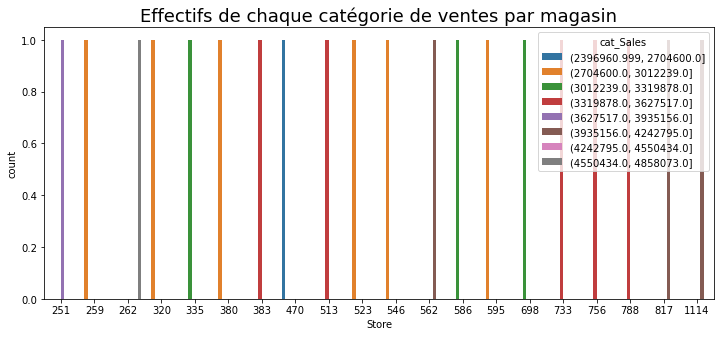

In [18]:
plt.figure(figsize = (12,5))

plt.title('Effectifs de chaque catégorie de ventes par magasin',fontsize=18)
sns.countplot(x = 'Store', hue = 'cat_Sales', data = agg_store_lead);

Parmis les magasins qui font le plus de ventes, 3 d'entre elles se distinguent

251 : affiche des ventes entre 8404514 et 8965342

259: affiche des ventes entre 7843686 et 8404514

262 : 7282858 et 7843686.
On remarque également que les leaders du marché ne sont pas forcément celle qui affichent de grosse ventes, bien qu'on y
retrouve le 262.

Nous allons regarder la fréquentation parmi les magasins leaders. Pour visualiser rapidement quels sont les
magasins qui attirent le plus de clients.

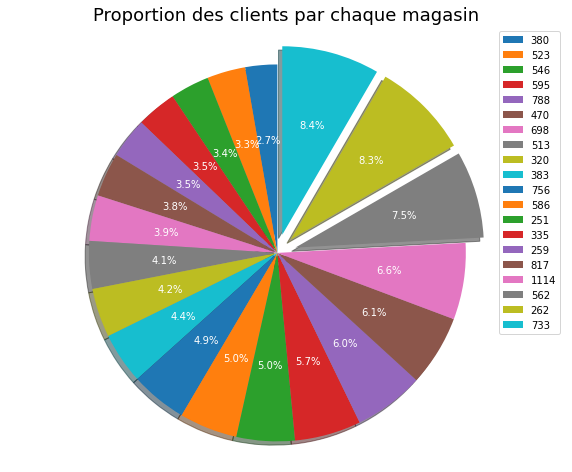

In [19]:
agg_store_lead = agg_store_lead.sort_values(by = 'Customers', ascending = True)


plt.figure(figsize=(10,8))

explode = np.zeros(17).tolist()

explode.extend([0.1,0.1,0.1])



plt.pie(agg_store_lead['Customers'],labels=agg_store_lead['Store'],explode = explode, autopct='%1.1f%%',

        shadow=True, startangle=90,textprops=dict(color="w"))

plt.axis('equal')

plt.title('Proportion des clients par chaque magasin',fontsize=18)

plt.legend(loc="best");

Les magasins de tête le 262, 733 , 1114 et 562 et 817 attirent à eux seuls,
36.9% des clients sur 2014

In [20]:
agg_store_less = agg_store.tail(20)
agg_store_less

,Store,Sales,Customers,Promo,CompetitionDistance
1093,1094,179792,14894,15,[2380.0]
230,231,179774,15026,15,[3840.0]
976,977,179047,19316,15,[520.0]
709,710,178245,14571,15,[1500.0]
305,306,173989,18652,15,[5100.0]
21,22,173627,19492,15,[1040.0]
659,660,169995,18873,15,[1200.0]
31,32,163449,18960,15,[2910.0]
824,825,161983,19759,15,[380.0]
1064,1065,161685,18665,15,[1290.0]


In [21]:
borne_inf = int(round(agg_store_less['Customers'].min()))

borne_sup = int(round(agg_store_less['Customers'].max()))

longueur = int(round((borne_sup - borne_inf)/7))

agg_store_less['cat_Customers'] = pd.cut(agg_store_less['Customers'], bins = np.arange(max(0,borne_inf - longueur),borne_sup + longueur,longueur),include_lowest=True)

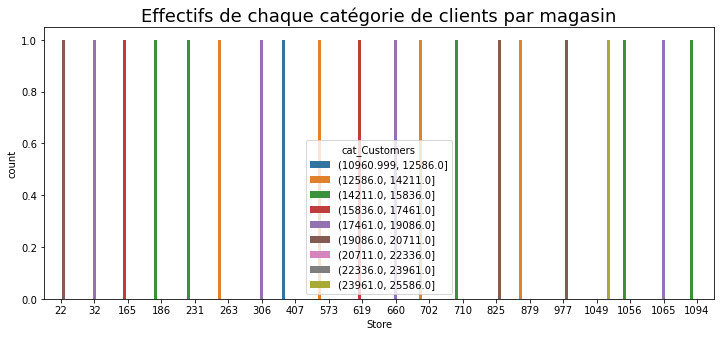

In [22]:
plt.figure(figsize = (12,5))

plt.title('Effectifs de chaque catégorie de clients par magasin',fontsize=18)

sns.countplot(x = 'Store', hue = 'cat_Customers', data = agg_store_less)

In [23]:
agg_StoreType = sales_2014.groupby(['StoreType'], as_index = False).sum()

agg_StoreType['performance'] = agg_StoreType['Sales']/agg_StoreType['Customers']


In [24]:
agg_StoreType

,StoreType,Store,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Open,Promo,StateHoliday,SchoolHoliday,Id,année,mois,jour,jr sem,performance
0,1,58046848,81188,571429750.0,797203.0,207949182.0,43768,963104.0,208084195.0,28308,...,103456,46998,85,25880,52436386960,208360384,887729,1682389,257662,8.725064
1,2,2123229,2372,4085410.0,29039.0,7576090.0,980,24196.0,7581187.0,331,...,3769,1456,162,872,1933256350,7590766,32587,61531,11275,5.100760
2,3,15988744,25766,91602840.0,197967.0,52942510.0,12366,258504.0,52982030.0,10565,...,26343,12040,23,6622,13397663007,53054802,227018,427182,65380,8.564009
3,4,29098164,71794,408163340.0,441728.0,110010478.0,29061,647943.0,110056958.0,19532,...,54718,24778,34,13720,27811731936,110202052,465221,892492,136065,11.231741


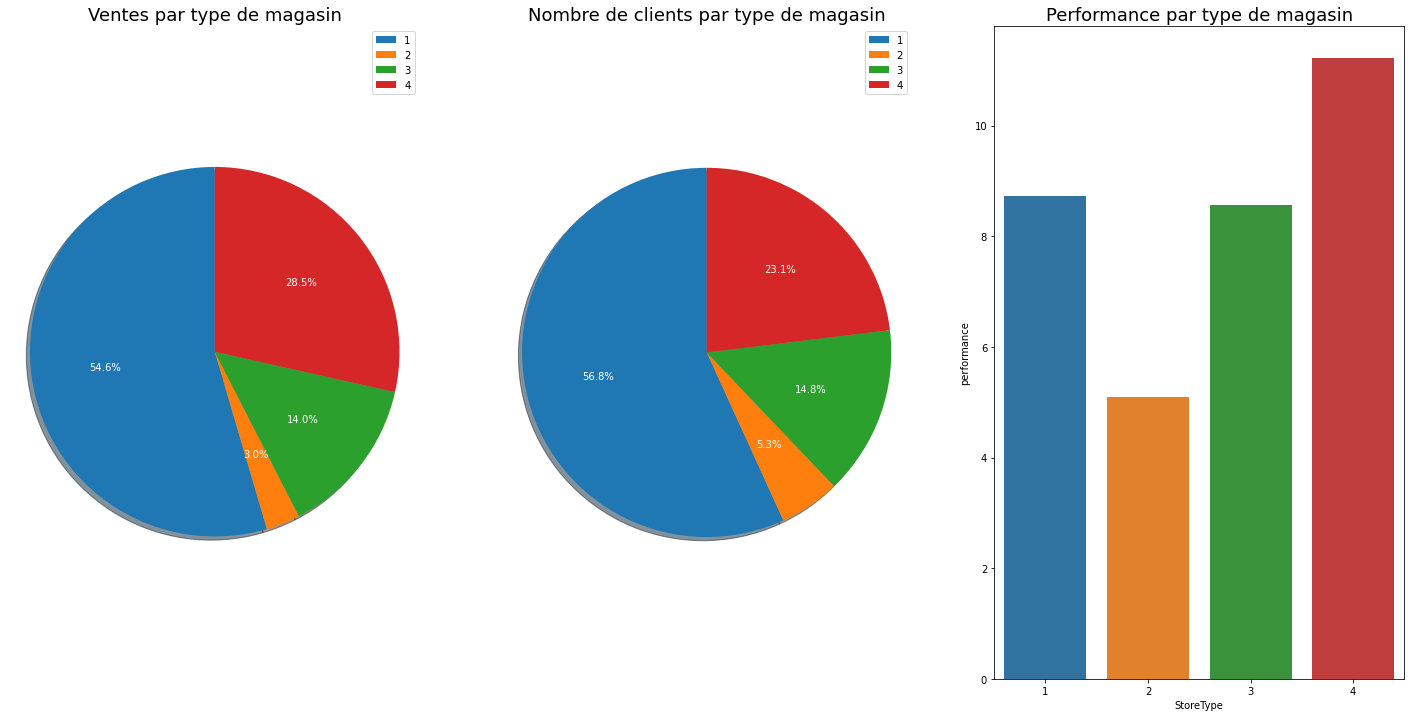

In [25]:
fig1, ax1 = plt.subplots(1,3,figsize=(25,12))

ax1[0].pie(agg_StoreType['Sales'].values,labels=agg_StoreType['StoreType'].values, autopct='%1.1f%%',

            shadow=True, startangle=90,textprops=dict(color="w"))

ax1[0].axis('equal')

ax1[0].set_title('Ventes par type de magasin',fontsize=18)

ax1[0].legend(loc="best");


ax1[1].pie(agg_StoreType['Customers'].values,labels=agg_StoreType['StoreType'].values, autopct='%1.1f%%',

            shadow=True, startangle=90,textprops=dict(color="w"))

ax1[1].axis('equal')

ax1[1].set_title('Nombre de clients par type de magasin',fontsize=18)

ax1[1].legend(loc="best");



ax1[2] = sns.barplot(x = 'StoreType', y = 'performance', data = agg_StoreType)

ax1[2].set_title('Performance par type de magasin',fontsize=18);


Le type 1 présentant les plus grosses ventes mais également le plus grand nombre de clients. Cela vient de la
forte relation linéaire entre Sales et Customers. Cependant si on parle en termes de performance le type 1 n'arrive
qu'en deuxième position. C'est toujours le même dilemme : faire du volume avec le risque de dégrader la performance
contre cibler des clientèles particulières ce qui limite le, volume mais améliore la performance. 

In [26]:
agg_store_lead['performance'] = agg_store_lead['Sales']/agg_store_lead['Customers']

agg_store_lead = agg_store_lead.sort_values(by= 'performance', ascending = True)

In [38]:
agg_store_lead

,Store,Sales,Customers,Promo,CompetitionDistance,cat_Sales,performance
732,733,3571591,809539,90,[860.0],"(3319878.0, 3627517.0]",4.411883
258,259,2866962,580788,90,[210.0],"(2704600.0, 3012239.0]",4.936331
334,335,3136181,549950,90,[90.0],"(3012239.0, 3319878.0]",5.702666
561,562,4168662,721575,90,[1210.0],"(3935156.0, 4242795.0]",5.777171
261,262,4858073,801601,90,[1180.0],"(4550434.0, 4858073.0]",6.060463
585,586,3073913,481228,88,[250.0],"(3012239.0, 3319878.0]",6.387644
1113,1114,4071990,634396,89,[870.0],"(3935156.0, 4242795.0]",6.418688
816,817,4130224,586898,89,[140.0],"(3935156.0, 4242795.0]",7.037380
755,756,3323845,469443,88,[50.0],"(3319878.0, 3627517.0]",7.080402
319,320,2966611,406114,89,[210.0],"(2704600.0, 3012239.0]",7.304873


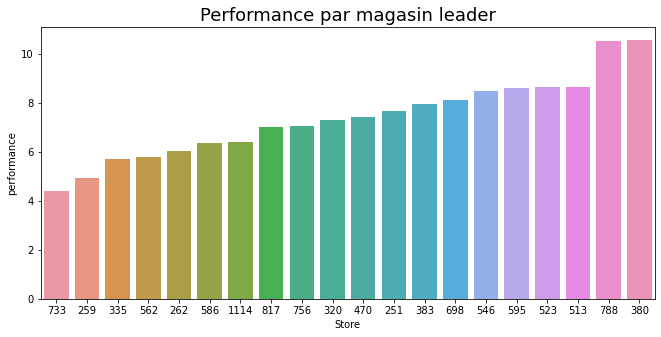

In [28]:
agg_store_lead['performance'] = agg_store_lead['Sales']/agg_store['Customers']

plt.figure(figsize = (11,5))

plt.title('Performance par magasin leader',fontsize=18)

sns.barplot(x = 'Store', y = 'performance', order = agg_store_lead['Store'], data = agg_store_lead);

Les magasins de tête notamment les leaders (262,562,733) sont loin d'avoir les meilleurs chiffres. Ils font même pire que les autes.

les 3 magasins vendent et attirent le plus, cependant le panier de ventes par client est moins élevé que dans d'autres magasins. On tient une piste
d'amélioration : les clients viennent et achètent mais pas suffisamment relativement aux autres magasins. On peut
encore augmenter le potentiel de ventes de ces 3 magasins.

Nous allons nous intéresser à la stratégie promo mise en place dans les magasins.


In [45]:
agg_promo = store_train.groupby(['Store','Promo'], as_index = False).agg({'Sales':'sum','Customers':'sum'})
agg_promo['performance'] = agg_promo[('Sales')]/agg_promo[('Customers')]
agg_promo


,Store,Promo,Sales,Customers,performance
0,1,0,459971,56272,8.174065
1,1,1,464275,51083,9.088640
2,2,0,419250,53236,7.875310
3,2,1,565069,62188,9.086464
4,3,0,566610,67986,8.334216
...,...,...,...,...,...
2225,1113,1,688059,69697,9.872147
2226,1114,0,2092889,340444,6.147528
2227,1114,1,1979101,293952,6.732735
2228,1115,0,626613,45561,13.753276


In [60]:
array_20_store_lead = agg_store_lead['Store'].values
list_20_store_lead= list(list_20_store_lead)

new = agg_promo['Store'].isin(list_20_store_lead)
agg_promo_lead=agg_promo[new]


In [61]:
agg_promo_lead.head()

,Store,Promo,Sales,Customers,performance
500,251,0,1821539,249277,7.307289
501,251,1,1892734,233282,8.113502
516,259,0,1716788,347234,4.944182
517,259,1,1150174,233554,4.924660
522,262,0,3001270,502203,5.976209


In [50]:
list_store_lead = [733,259,335,562,262,]

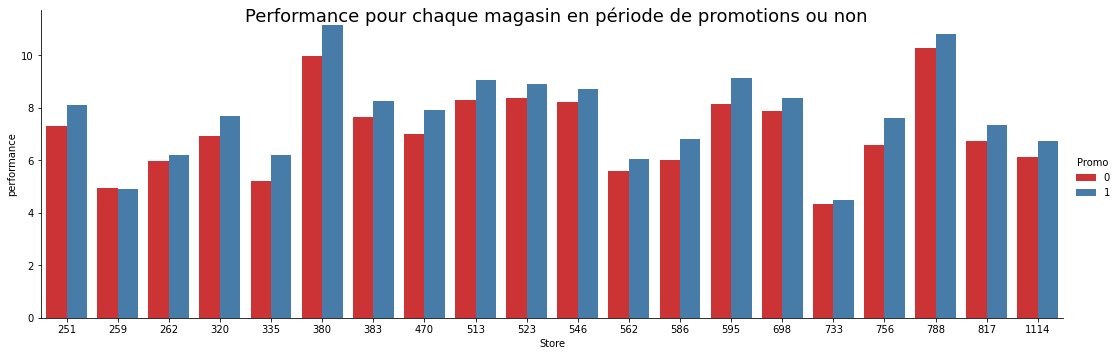

In [62]:
sns.catplot(x = 'Store', y = 'performance', hue = 'Promo', kind = 'bar', height = 5, aspect = 3, palette = 'Set1', data = agg_promo_lead).fig.suptitle('Performance pour chaque magasin en période de promotions ou non',fontsize=18);

Pour la plupart des magasins, la statégie promos ont l'air de fonctionner elles boostent les ventes. On voit très nettement
une amélioration de la performance en période depromotion. Cependant si on prend nos 3 magasins leader, l'amélioration de la performance est moins nette que chez
d'autres. Peut-être faut-il revoir la stratégie promo pour ces magasins : le choix de la date ou le type de promo
proposé.


In [69]:
agg_promo_mean_sum = store_train.groupby(['Store','Promo'], as_index = False).agg({'Sales':['mean','sum'],'Customers':['mean','sum']})
agg_assortment = store_train.groupby(['Assortment','Promo'], as_index = False).agg({'Sales':['mean','sum'],'Customers':['mean','sum']})

agg_assortment['performance'] = agg_promo_mean_sum[('Sales','sum')]/agg_promo_mean_sum[('Customers','sum')]

agg_assortment

Assortment Promo        Sales               Customers           performance
                           mean        sum         mean       sum            
0          0     0  5669.958158  299878417   691.412562  36568119    8.174065
1          0     1  8053.973771  353432531   858.378415  37668220    9.088640
2          1     0  9102.629693   10668282  2141.783276   2510170    7.875310
3          1     1  9657.948370    7108250  2298.324728   1691567    9.086464
4          2     0  6492.032051  317804445   714.043103  34954552    8.334216
5          2     1  8780.542887  356955410   853.892037  34713273   10.071034

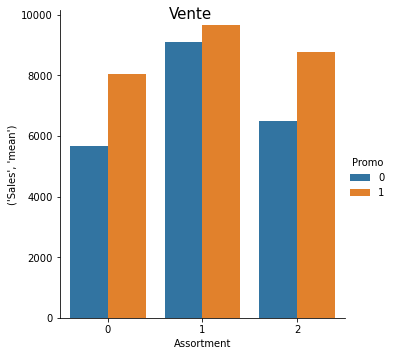

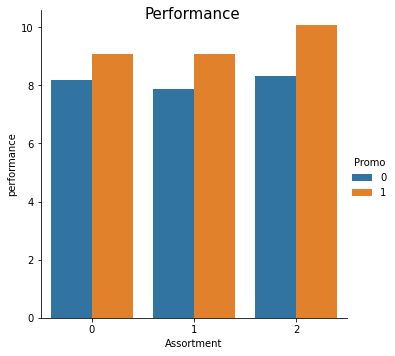

In [72]:
sns.catplot(x = 'Assortment', y = ('Sales','mean'), hue = 'Promo', data = agg_assortment, kind = 'bar').fig.suptitle('Vente',fontsize=15);
sns.catplot(x = 'Assortment', y = 'performance', hue = 'Promo', kind = 'bar', data = agg_assortment).fig.suptitle('Performance',fontsize=15);

Les deux semblent sensibles aux promotions. Remarquons que le panier élargi présente une
plus forte variation avec un accroissement des ventes plus important en période de promotion. L'idée d'être plus
agressif sur ce type de panier permettrait d'accroître encore les ventes. Cependant cela reste conditionné à la
performance des deux paniers. En observant le deuxième graphe on voit que la tendance se confirme, l'indice de performance
s'améliore plus nettement sur le panier élargi.


In [ ]:
La question qu'on peut se poser légitimement : des promos oui mais sur quels produits ? Nous disposons de la variable Assortment qui nous renseigne sur le type de
panier de produits achetés. Sur le précédent module nous avons remarqué trois types : 1 = basique et 2 = élargi.
